# **Predicting Student's Academic Performance For University**

# **1.Importing necessary dependencies**

In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier, plot_importance

# **2. Load and Read our DataSet**

In [2]:
df = pd.read_csv("Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# **3. DataSet Describe**

In [3]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [4]:
print(df.dtypes)

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object


# **4. Check DataSet Shape**

In [5]:
print(df.shape)

(480, 17)


# **5. Check DataSet Columns**

In [6]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [7]:
df.drop(columns='SectionID', inplace=True)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# **6. Handling missing data**

In [8]:
# check for null values:
null_counts = df.isnull().sum()
for column, null_count in null_counts.items():
  print(f"Column '{column}' has {null_count} null values.")

Column 'gender' has 0 null values.
Column 'NationalITy' has 0 null values.
Column 'PlaceofBirth' has 0 null values.
Column 'StageID' has 0 null values.
Column 'GradeID' has 0 null values.
Column 'Topic' has 0 null values.
Column 'Semester' has 0 null values.
Column 'Relation' has 0 null values.
Column 'raisedhands' has 0 null values.
Column 'VisITedResources' has 0 null values.
Column 'AnnouncementsView' has 0 null values.
Column 'Discussion' has 0 null values.
Column 'ParentAnsweringSurvey' has 0 null values.
Column 'ParentschoolSatisfaction' has 0 null values.
Column 'StudentAbsenceDays' has 0 null values.
Column 'Class' has 0 null values.


# **7. Gender Value Counts & Percentage In Dataset**

In [9]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


<Axes: >

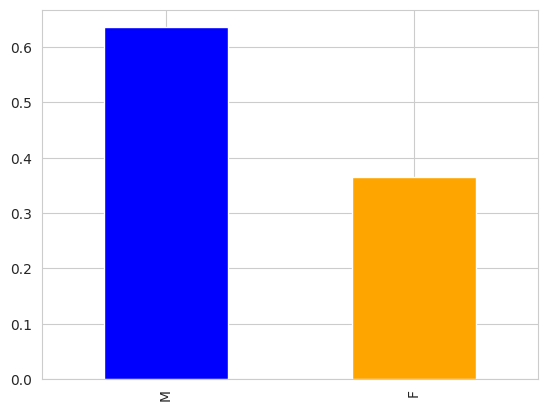

In [10]:
print('Percentage',df.gender.value_counts(normalize=True))
colors = ['blue', 'orange']
df.gender.value_counts(normalize=True).plot(kind='bar', color=colors)

# **8. NationalITy Value Counts & Percentage In Dataset**

In [11]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<Axes: >

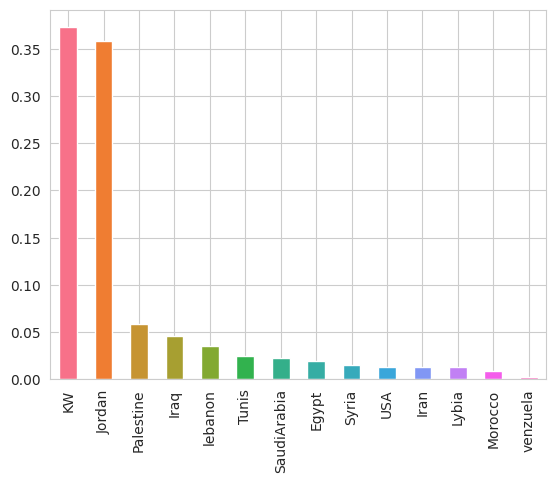

In [12]:
print('Percentage',df.NationalITy.value_counts(normalize=True))
colors = sns.color_palette('husl', n_colors=len(df['NationalITy'].unique()))
df.NationalITy.value_counts(normalize=True).plot(kind='bar', color = colors)

# **9. PlaceofBirth Value Counts & Percentage In Dataset**

In [13]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<Axes: >

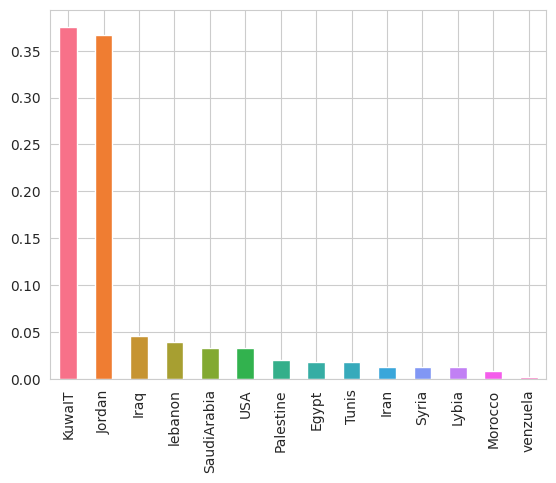

In [14]:
print('Percentage',df.PlaceofBirth.value_counts(normalize=True))
colors = sns.color_palette('husl', n_colors=len(df['PlaceofBirth'].unique()))
df.PlaceofBirth.value_counts(normalize=True).plot(kind='bar', color = colors)

# **10. StageID Value Counts & Percentage In Dataset**

In [15]:
df['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

Percentage
 MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


<Axes: >

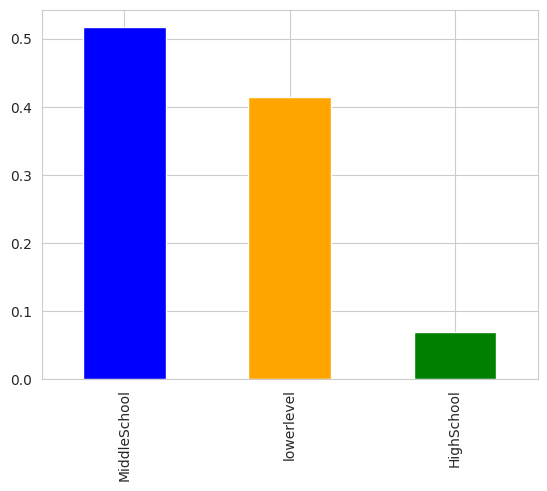

In [16]:
print('Percentage\n',df.StageID.value_counts(normalize=True))
colors = ['blue', 'orange', 'green']
df.StageID.value_counts(normalize=True).plot(kind='bar', color = colors)

# **11. GradeID Value Counts & Percentage In Dataset**

In [17]:
df['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<Axes: >

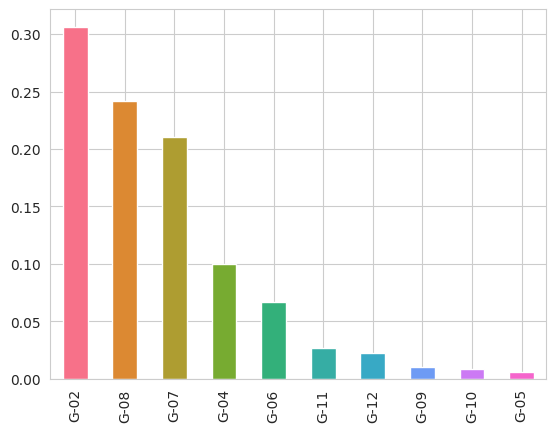

In [18]:
print('Percentage',df.GradeID.value_counts(normalize=True))
colors = sns.color_palette('husl', n_colors=len(df['GradeID'].unique()))
df.GradeID.value_counts(normalize=True).plot(kind='bar', color = colors)

# **12. Topic Value Counts & Parcentage In Dataset**

In [19]:
df['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<Axes: >

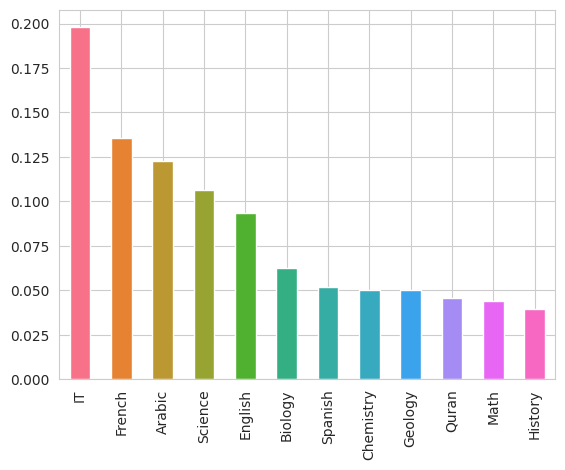

In [20]:
print('Percentage',df.Topic.value_counts(normalize=True))
colors = sns.color_palette('husl', n_colors=len(df['Topic'].unique()))
df.Topic.value_counts(normalize=True).plot(kind='bar', color = colors)

# **13. Semester Value Counts & Parcentage In Dataset**

In [21]:
df['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

Parcentage
 F    0.510417
S    0.489583
Name: Semester, dtype: float64


<Axes: >

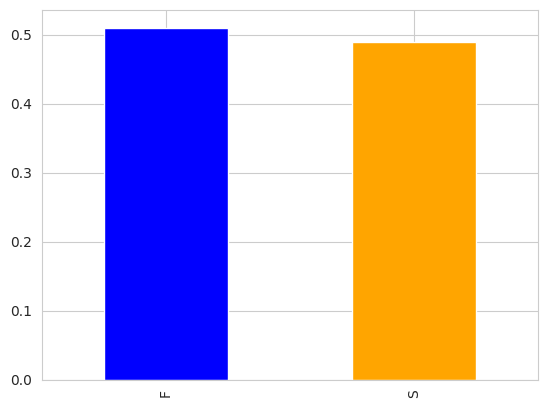

In [22]:
print('Parcentage\n',df.Semester.value_counts(normalize=True))
colors = ['blue', 'orange']
df.Semester.value_counts(normalize=True).plot(kind='bar', color = colors)

# **14. Relation Value Counts & Parcentage In Dataset**

In [23]:
df['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

Parcentage Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


<Axes: >

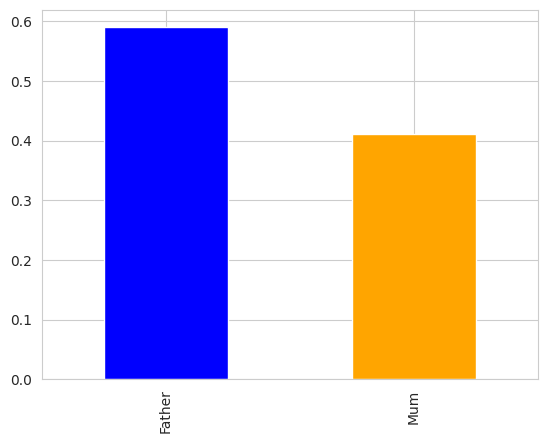

In [24]:
print('Parcentage',df.Relation.value_counts(normalize=True))
colors = ['blue', 'orange']
df.Relation.value_counts(normalize=True).plot(kind='bar', color = colors)

# **15. ParentschoolSatisfaction Value Counts & Parcentage In Dataset**

In [25]:
df['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

Parcentage
 Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


<Axes: >

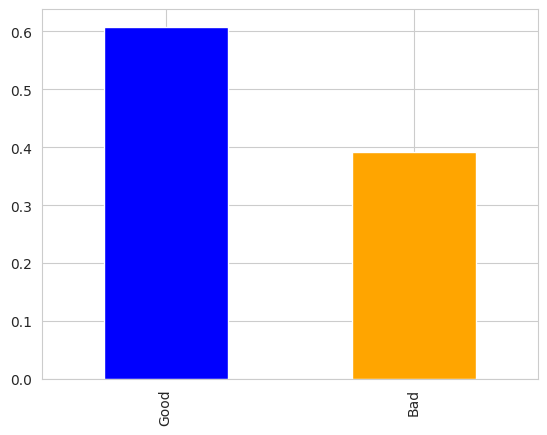

In [26]:
print('Parcentage\n',df.ParentschoolSatisfaction.value_counts(normalize=True))
colors = ['blue', 'orange']
df.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar', color = colors)

# **16. ParentAnsweringSurvey Value Counts & Parcentage In Dataset**

In [27]:
df['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Parcentage Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


<Axes: >

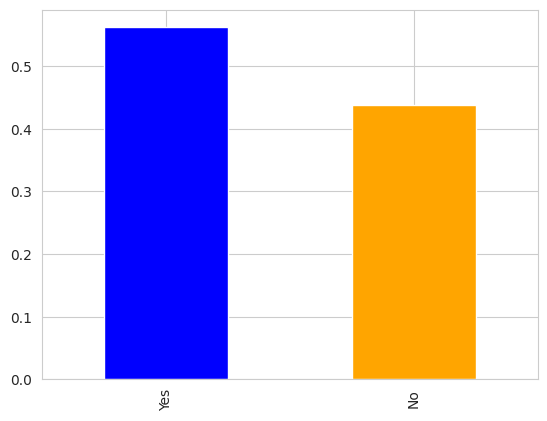

In [28]:
print('Parcentage',df.ParentAnsweringSurvey.value_counts(normalize=True))
colors = ["blue", 'orange']
df.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar', color = colors)

# **17. StudentAbsenceDays Value Counts & Parcentage In Dataset**

In [29]:
df['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Parcentage
 Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


<Axes: >

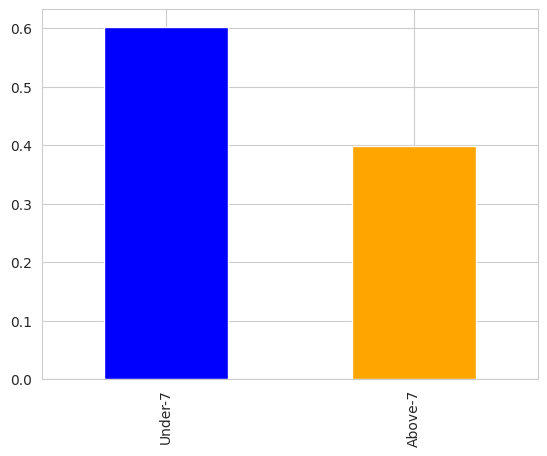

In [30]:
print('Parcentage\n',df.StudentAbsenceDays.value_counts(normalize=True))
coclors = ['blue', 'orange']
df.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar', color = colors)

# **18. Class Value Counts & Parcentage In Dataset**

In [31]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Parcentage
 M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<Axes: >

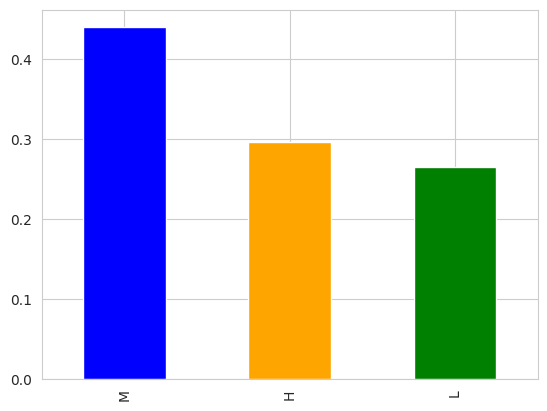

In [32]:
print('Parcentage\n',df.Class.value_counts(normalize=True))
colors = ['blue', 'orange', 'green']
df.Class.value_counts(normalize=True).plot(kind='bar', color = colors)

<Axes: xlabel='Semester', ylabel='count'>

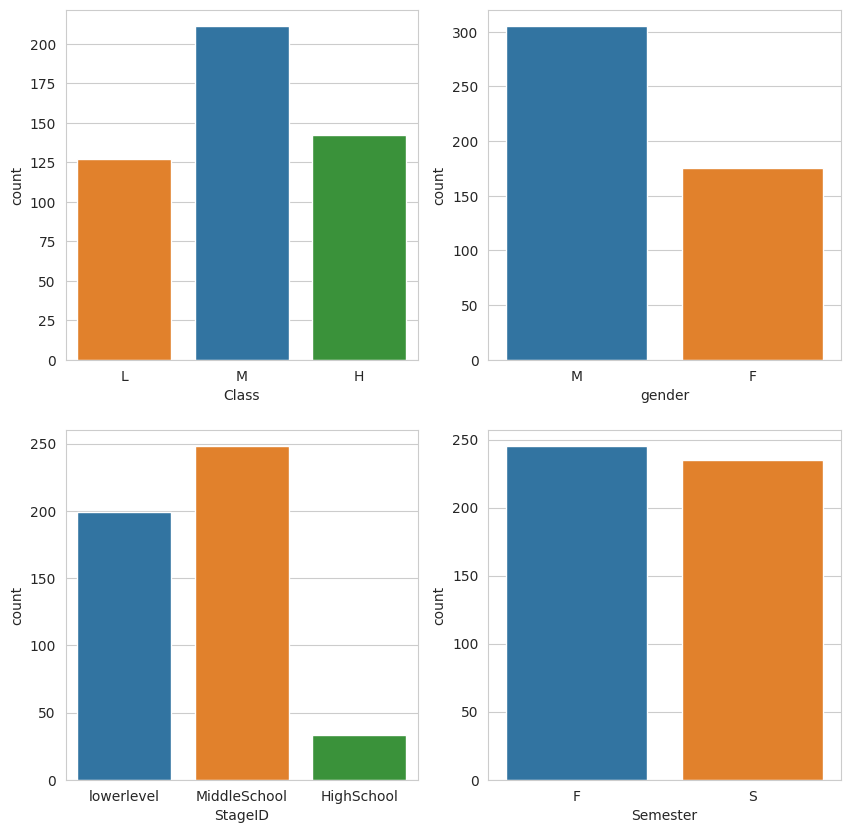

In [33]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', hue='Class', data=df, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', hue='gender', data=df, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', hue='StageID', data=df, ax=axarr[1,0])
sns.countplot(x='Semester', hue='Semester', data=df, ax=axarr[1,1])

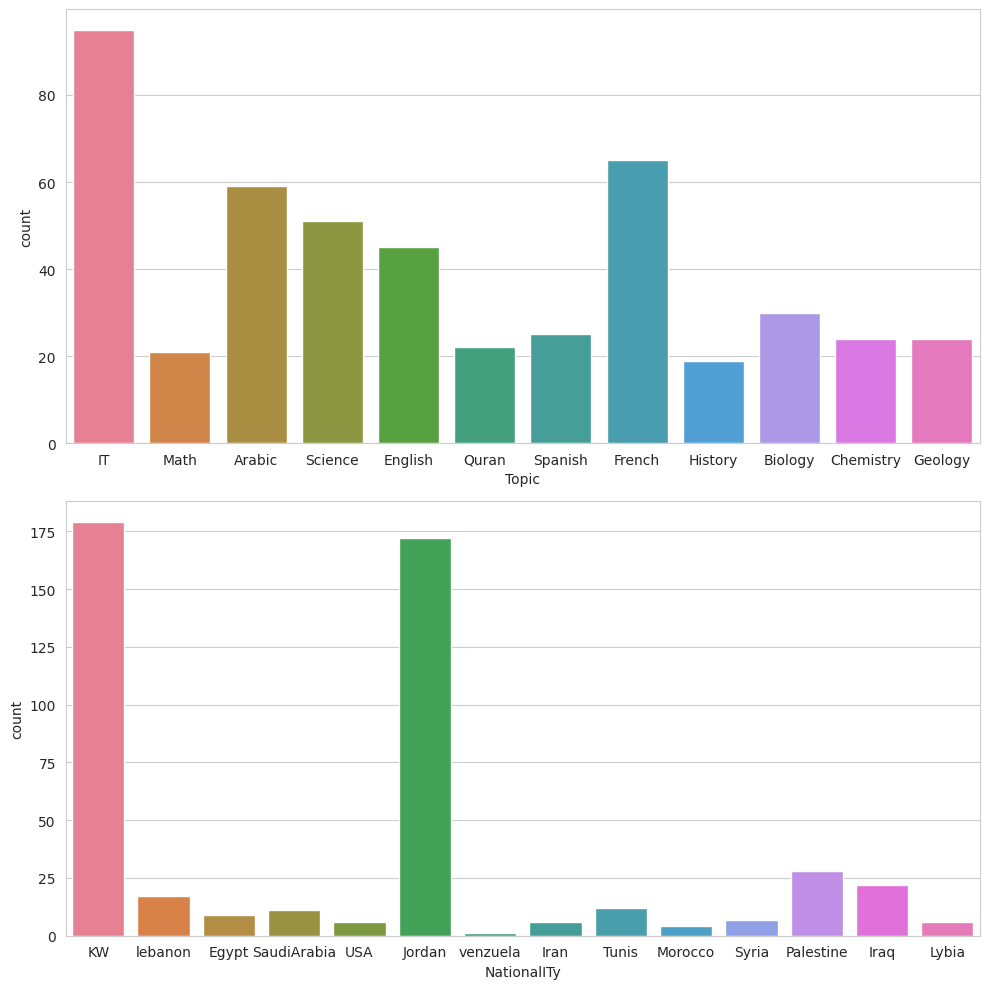

In [34]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(10, 10))
sns.countplot(x='Topic', data=df, ax=axis1, hue='Topic')
sns.countplot(x='NationalITy', data=df, ax=axis2, hue='NationalITy')

plt.tight_layout()
plt.show()

<Axes: xlabel='gender', ylabel='count'>

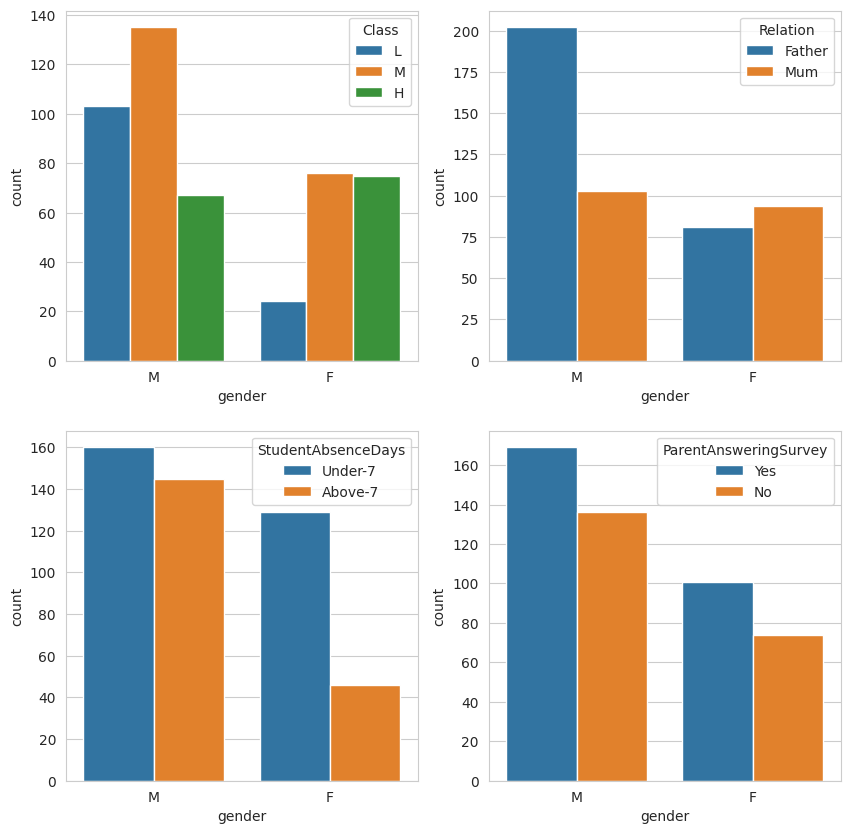

In [35]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=df, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=df, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=df, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=df, ax=axarr[1,1], order=['M','F'])

<Axes: xlabel='NationalITy', ylabel='count'>

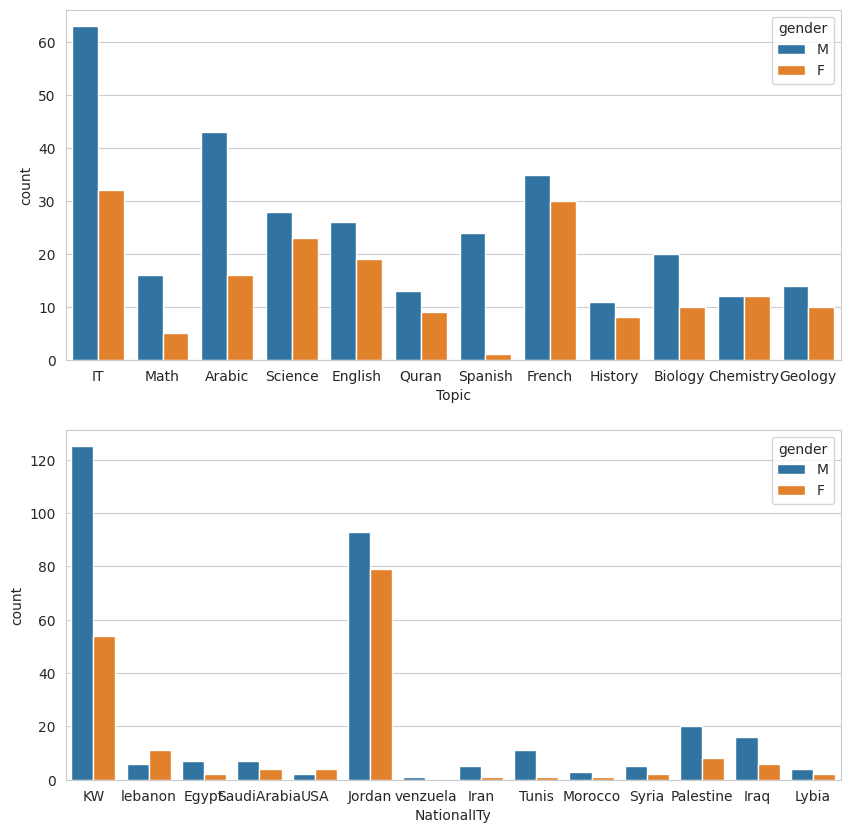

In [36]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=df, ax=axis2)

# **19. Visualizing categorical features with numerical features**

<Axes: xlabel='Class', ylabel='Discussion'>

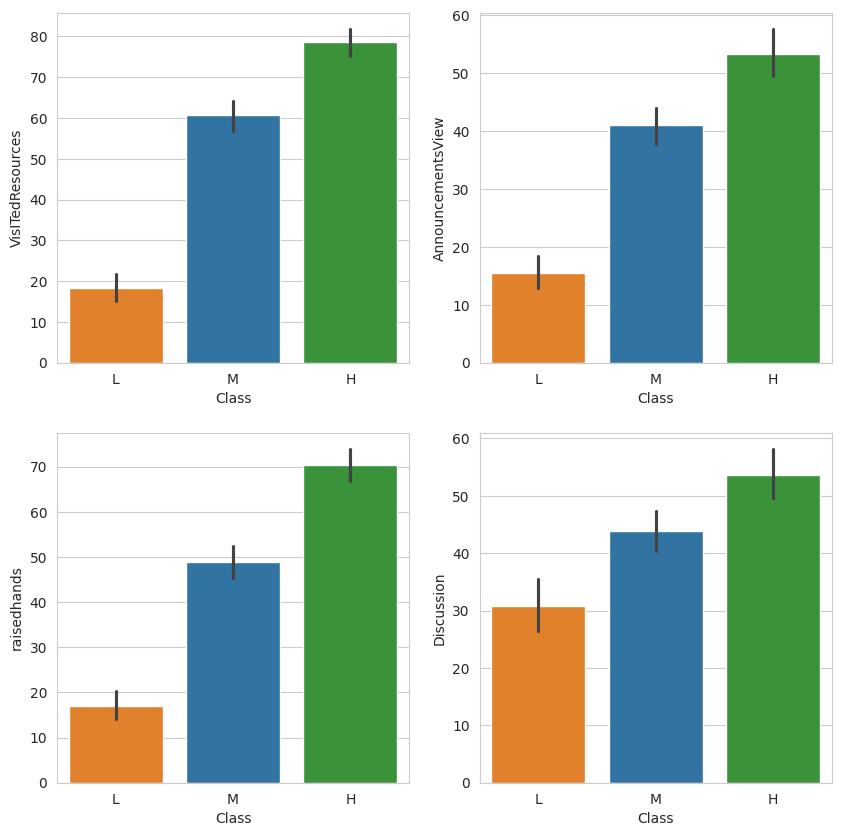

In [37]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', hue= 'Class', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', hue= 'Class', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', hue= 'Class', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', hue= 'Class', data=df, order=['L','M','H'], ax=axarr[1,1])

<Axes: xlabel='gender', ylabel='Discussion'>

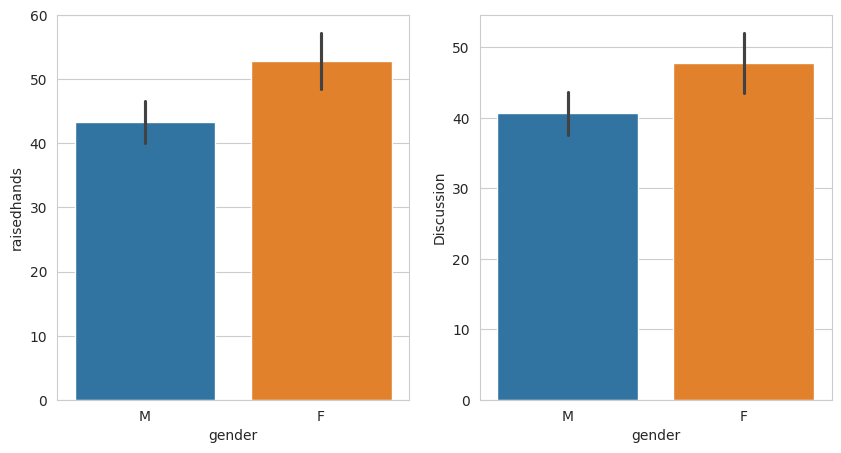

In [38]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='gender', y='raisedhands', hue = 'gender', data=df, ax=axis1)
sns.barplot(x='gender', y='Discussion', hue = 'gender', data=df, ax=axis2)

# **20. Other plots that help visualize Categorical vs Numerical data better**

<Axes: xlabel='Class', ylabel='VisITedResources'>

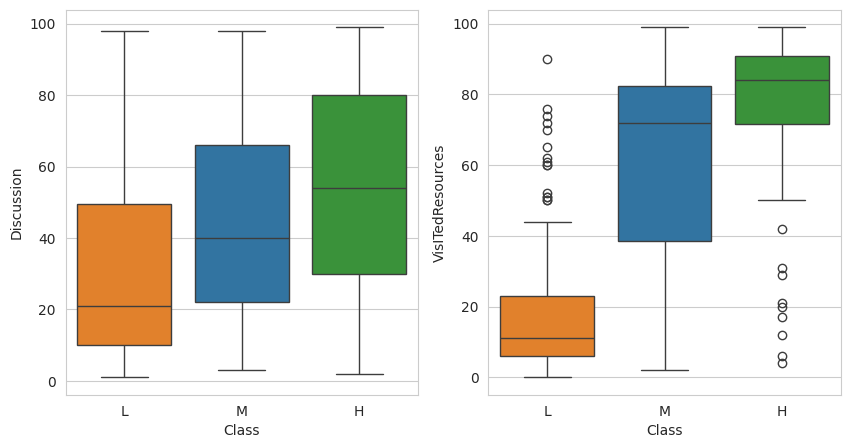

In [39]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x='Class', y='Discussion', hue = 'Class', data=df, order=['L','M','H'], ax=axis1)
sns.boxplot(x='Class', y='VisITedResources', hue = 'Class', data=df, order=['L','M','H'], ax=axis2)

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

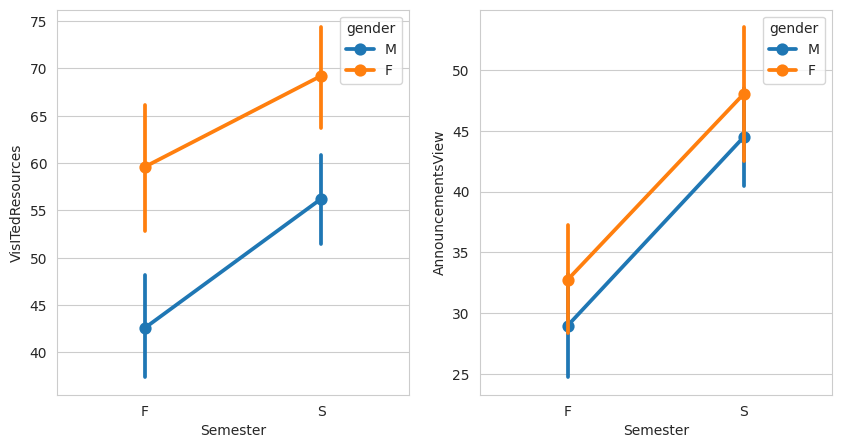

In [40]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis2)

# **21. Pairplot**

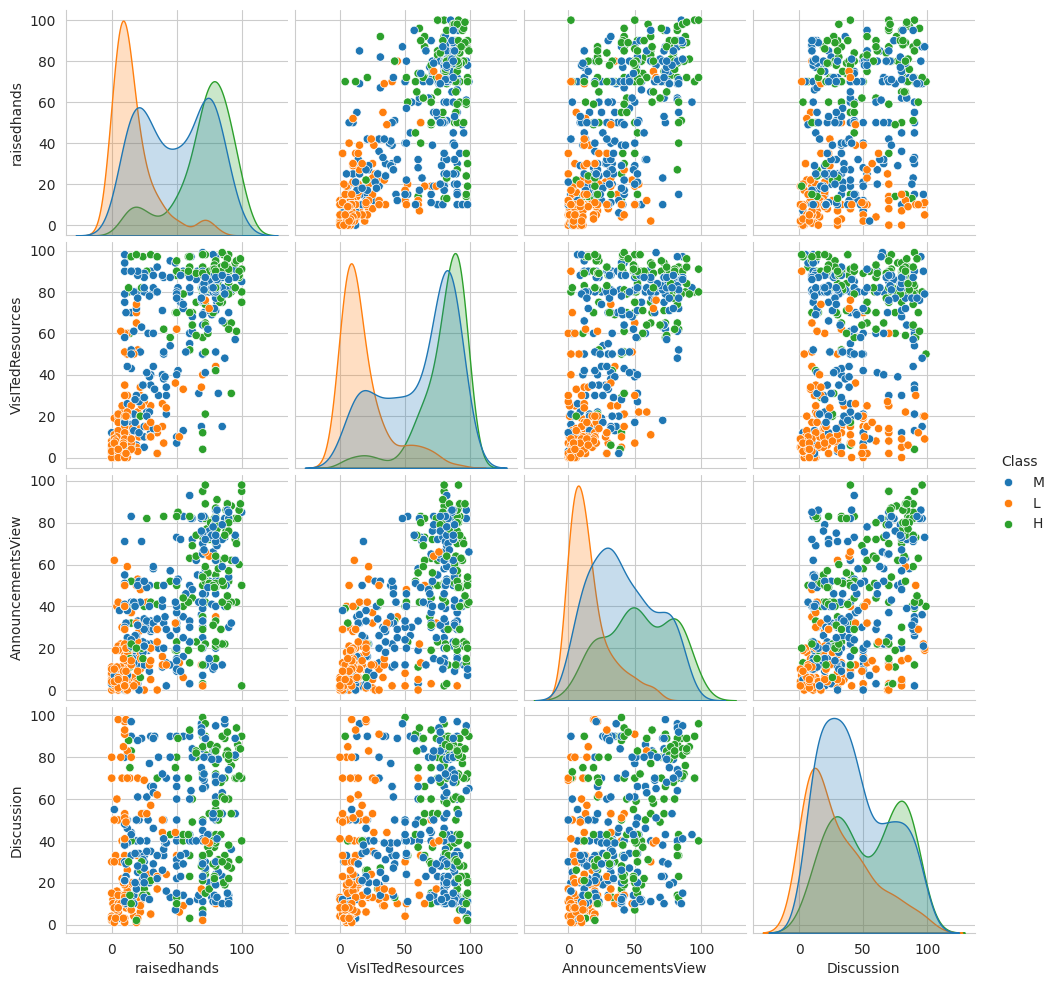

In [41]:
sns.pairplot(df,hue='Class')

# **22. Applying Machine Learning Algorithm**

### Target Encoding

In [42]:
Features = df.drop('Class',axis=1)
Target = df['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

### Splitting Dataset into Training and Test Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=48)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 15)
(96, 15)
(384,)
(96,)


## **Logistic Regression Model**

In [44]:
# Create a logistic regression model
Logit_Model = LogisticRegression(max_iter=5000)

# Define the parameter grid to search
param_grid = {
    'C': [0.01,0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2']  # Penalty type
}

# Create GridSearchCV object
grid_search = GridSearchCV(Logit_Model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)
Logit_Model= grid_search.best_estimator_
# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.7370129870129871


<p><b>Logistic Regression's Prediction,Score & Report

In [45]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
Prediction_logistic=Prediction

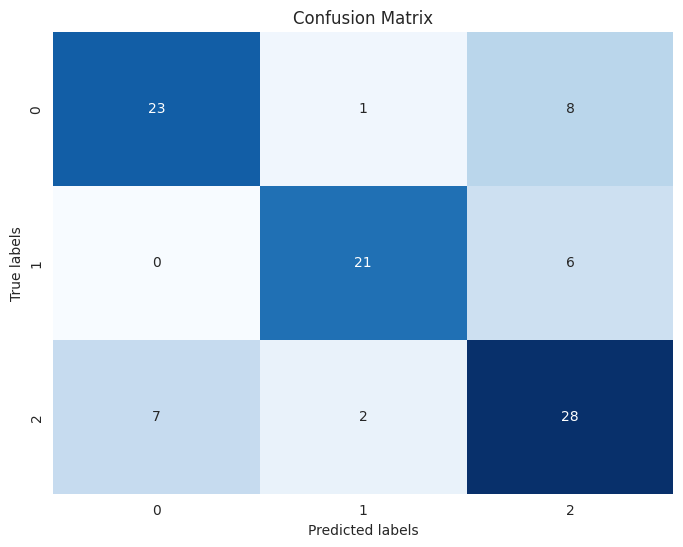

In [46]:
# Generate confusion matrix
cm = confusion_matrix(y_test, Prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print("Accuracy of logistic regression model is ", Score)

Accuracy of logistic regression model is  0.75


## **Decision Tree Model**

In [48]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create a decision tree classifier
tree_model = DecisionTreeClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict using the best model
tree_model = grid_search.best_estimator_
prediction = tree_model.predict(X_test)

# Calculate accuracy score
score = accuracy_score(y_test, prediction)

# Generate classification report
report = classification_report(y_test, prediction)

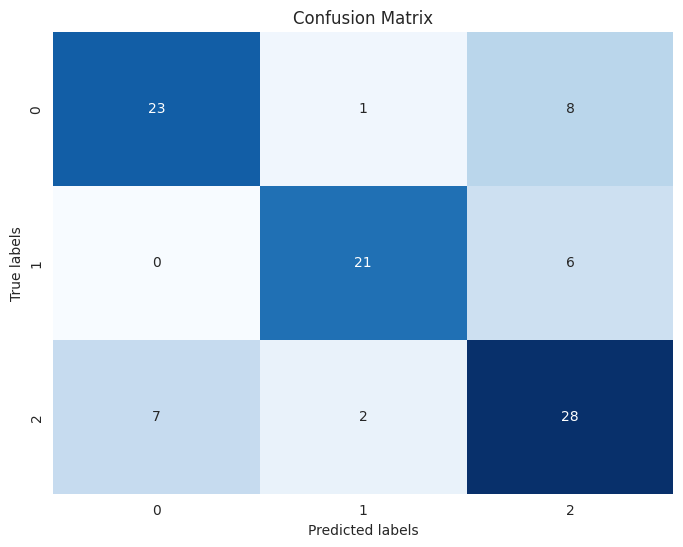

In [49]:
# Generate confusion matrix
cm = confusion_matrix(y_test, Prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

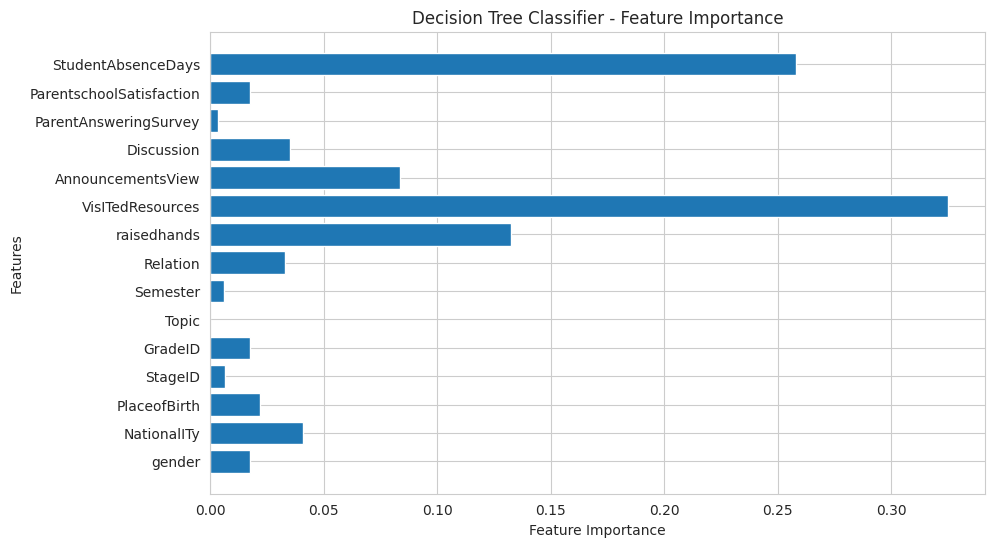

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(tree_model.feature_importances_)), tree_model.feature_importances_, align='center')
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Classifier - Feature Importance')
plt.show()

In [51]:
print("Accuracy of decision tree model is ", Score)

Accuracy of decision tree model is  0.75


## **XGBoost Model**

In [52]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

xgb = XGBClassifier(seed=10)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict using the best model
xgb = grid_search.best_estimator_
xgb_pred = xgb.predict(X_test)

# Calculate accuracy score
score = accuracy_score(y_test_encoded, xgb_pred)

# Generate classification report
report = classification_report(y_test_encoded, xgb_pred)

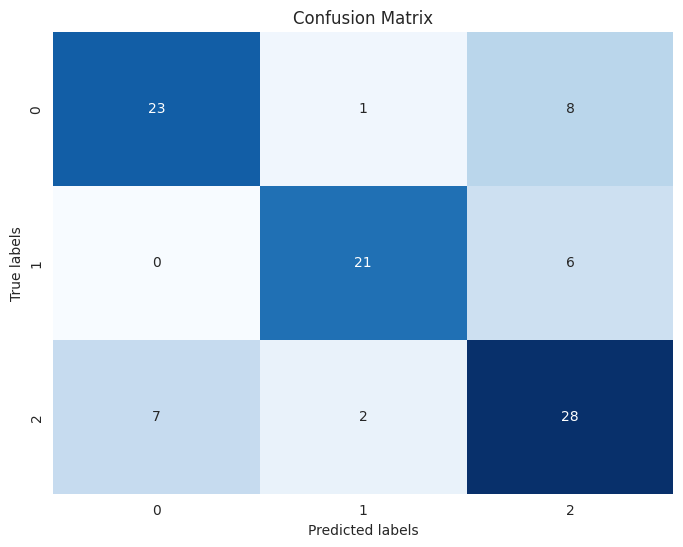

In [53]:
# Generate confusion matrix
cm = confusion_matrix(y_test, Prediction)
Prediction_tree = Prediction

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

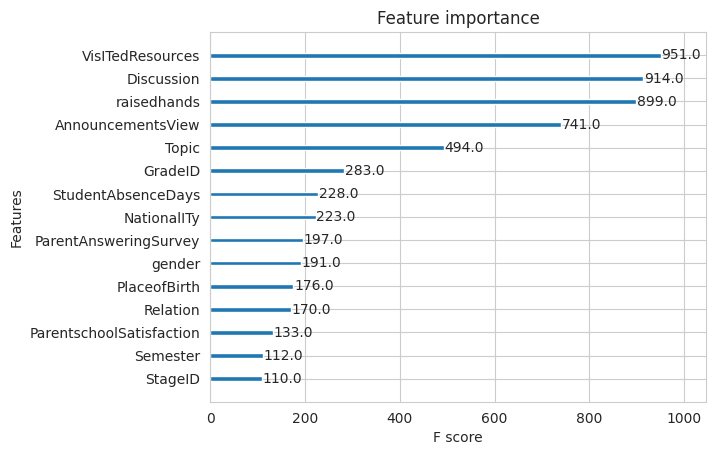

In [54]:
plot_importance(xgb)

In [55]:
print("Accuracy of xgboost model is ", score)

Accuracy of xgboost model is  0.7916666666666666


# **23. Analyzing our models results**

In [56]:
# Define the individual models
logit_model = LogisticRegression(max_iter=3000,penalty="l2")
tree_model = DecisionTreeClassifier(max_depth=5)
xgb_model = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)

# Create a VotingClassifier with the models
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic', logit_model),
        ('decision_tree', tree_model),
        ('xgboost', xgb_model)
    ],
    voting='hard'  # Use majority voting
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

voting_pred=Prediction = ensemble_model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

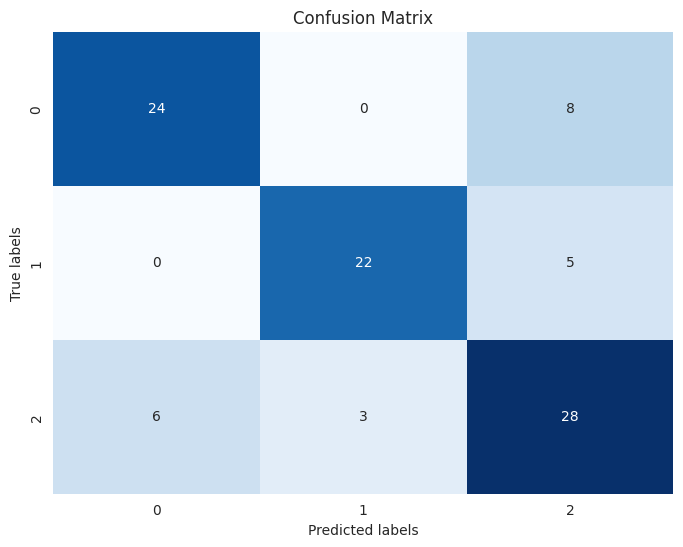

In [57]:
# Generate confusion matrix
cm = confusion_matrix(y_test, Prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

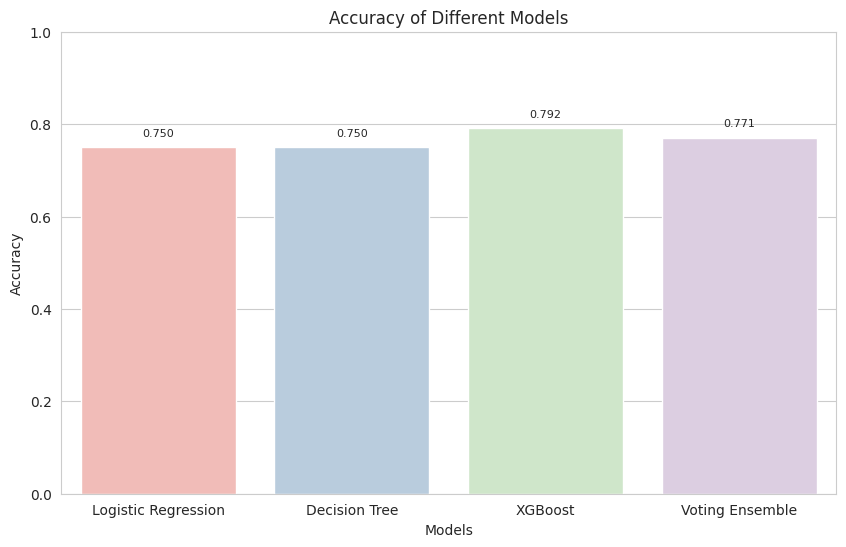

In [60]:
report_logistic = classification_report(y_test, Prediction_logistic, output_dict=True)
report_tree = classification_report(y_test, Prediction_tree, output_dict=True)
report_xgb = classification_report(y_test_encoded, xgb_pred, output_dict=True)
report_voting = classification_report(y_test, voting_pred, output_dict=True)

# Extract accuracy for each model
accuracy_logistic = report_logistic['accuracy']
accuracy_tree = report_tree['accuracy']
accuracy_xgb = report_xgb['accuracy']
accuracy_voting = report_voting['accuracy']

# Set the seaborn color palette
sns.set_palette("Pastel1")
# Create a DataFrame for plotting with seaborn
data = {
    'Models': ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Voting Ensemble'],
    'Accuracies': [accuracy_logistic, accuracy_tree, accuracy_xgb, accuracy_voting],
}

df = pd.DataFrame(data)

# Plot bar chart for accuracy with varied hue
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Models', y='Accuracies', hue='Models', data=df)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to ensure accurate representation of accuracy
plt.legend().set_visible(False)

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

In [59]:
print("Average score for the three models :", report_voting['accuracy'])

Average score for the three models : 0.7708333333333334
